In [ ]:
!pip install pandas_datareader
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [ ]:
data=pdr.get_data_yahoo("ATVI", start="2021-01-01", end="2022-01-01")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,92.699997,92.910004,89.220001,89.900002,88.938156,7423100
2021-01-05,90.320000,90.750000,89.099998,90.690002,89.719704,4544100
2021-01-06,89.059998,89.900002,87.889999,88.000000,87.058479,7422100
2021-01-07,88.860001,90.750000,88.269997,89.669998,88.710609,6142200
2021-01-08,90.070000,91.370003,89.529999,91.300003,90.323181,4408800


In [ ]:
Op=np.array(data["Open"])
Hi=np.array(data["High"])
Lo=np.array(data["Low"])
Cl=np.array(data["Close"])
Adj=np.array(data["Adj Close"])
V=np.array(data["Volume"])

In [ ]:
input=np.column_stack((Op,Hi,Lo,Cl,V))
output=Adj

In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
input_scaled=SS.fit_transform(input)

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input_scaled,output)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
Ls=Sequential()
Ls.add(LSTM(200, input_shape=(5,1)))
Ls.add(Dense(150,activation="relu"))
Ls.add(Dense(1))
Ls.compile(loss="mse",metrics='mae', optimizer='adam')

In [ ]:
Ls.fit(train_input,train_output,epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 18ms/step - loss: 7215.7314 - mae: 84.1382
Epoch 2/100
6/6 [==============================] - 0s 17ms/step - loss: 7157.5918 - mae: 83.7750
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 7014.1025 - mae: 82.8669
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 6641.9922 - mae: 80.4779
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 5881.3149 - mae: 75.5326
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: 4747.9404 - mae: 67.5181
Epoch 7/100
6/6 [==============================] - 0s 17ms/step - loss: 3490.1074 - mae: 57.5025
Epoch 8/100
6/6 [==============================] - 0s 16ms/step - loss: 2290.5681 - mae: 46.0265
Epoch 9/100
6/6 [==============================] - 0s 15ms/step - loss: 1310.0326 - mae: 33.8547
Epoch 10/100
6/6 [==============================] - 0s 17ms/step - loss: 611.8922 - mae: 22.0942
Epoch 11/100
6/6 [============

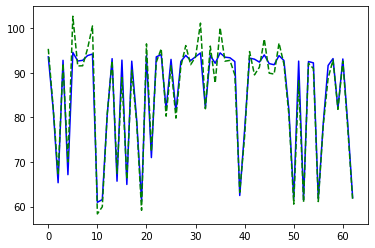

In [ ]:
plt.plot(Ls.predict(test_input),'b')
plt.plot(test_output,'g--')

In [ ]:
np.corrcoef(Ls.predict(test_input).T,np.array(test_output))

array([[1.        , 0.98018116],
       [0.98018116, 1.        ]])